# WORK IN PROGRESS!!!
**This notebook is not ready** but if you wan't to look at the mess below, then go ahead.

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
import os
import matplotlib.pyplot as plt
from numpy import arange
import wikipedia
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import Rectangle
from collections import Counter

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold

# 1.1. Initial dataset inspection

In [3]:
cols = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 
        'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 
        'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
df = pd.read_csv('imports-85.data', names=cols)
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [5]:
df.describe(include='all')

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


# Initial observations:
* we're managing a fairly small dataset - we should try to avoid removing rows
* we can see missing values replaced with '?' sign
* some columns which seem numeric are not numeric at all - this is probably due to storing missing values as '?'

# 1.2. Data cleaning 

**We have some missing values - instead of applying 1 method to a single dataframe, we'll create 6 different dataframes:**
* numeric_a - we'll drop rows without the price value, and fill the remaining empty cells with avg values for their columns
* numeric_b - in this df we'll drop empty rows from columns:  'bore', 'stroke', 'horsepower', 'peak_rpm', 'price', the remaining empty cells will be  filled with avg values for their columns
* numeric_c - we'll drop empty rows from columns:  'bore', 'stroke', 'horsepower', 'peak_rpm', then **we'll take special care filling in the missing values in price column**, the remaining empty cells(normalized losses) will be  filled with avg values for their columns

We'll also create normalized versions of the above dataframes: numeric_a_n, numeric_b_n, numeric_c_n

In [6]:
numeric_cols = ['normalized_losses', 'price', 'bore', 'stroke', 'horsepower', 'peak_rpm',]
df[numeric_cols] = np.where(df[numeric_cols] == '?', '', df[numeric_cols])

In [7]:
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

In [8]:
df[df.columns[df.isna().any()]].isna().sum()

normalized_losses    41
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [9]:
numeric = df.loc[:, df.dtypes != object].copy()

numeric_a = numeric.dropna(subset = ['price']).copy()
numeric_a = numeric_a.fillna(numeric.mean())
numeric_b = numeric.dropna(subset = [ 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']).copy()
numeric_b = numeric_b.fillna(numeric_b.mean())

# 1.3. numeric_c 

In [10]:
corr_df = numeric_a.corr()['price'].to_frame().merge(numeric_b.corr()['price'], 
                                           left_index=True, right_index=True, suffixes=['_A_corr', '_B_corr'])
corr_df.sort_values('price_A_corr')

,price_A_corr,price_B_corr
highway_mpg,-0.704692,-0.715590
city_mpg,-0.686571,-0.702685
peak_rpm,-0.101616,-0.104333
symboling,-0.082391,-0.084118
compression_rate,0.071107,0.069500
stroke,0.082269,0.093746
normalized_losses,0.133999,0.131736
height,0.135486,0.138291
bore,0.543155,0.546873
wheel_base,0.584642,0.585793


**How to fill in the missing price values for numeric_c?**

In numeric a and b dataframes we've filled in the missing values, using the mean value for the column. Very simplistic aproach that we're going to modify and upgrade for the dataframe numeric_c.
Our plan assumed being very thorough in filling in the missing price values in the last dataframe, that's why we've created a corelation dataframe for the 'price' column.
* in both dataframes the column with the highest corelation value with 'price' column is 'engine_size'
* we'll group the dataframe by engine_size - to increase precision we'll group the data into 20 bins
    * then we'll calculate average price value for every engine_size bin 
    * we'll assing the missing price values based on their engine_size
* **prediction:** the 'engine_size' column will most likely be the best column for predicting the price value

In [11]:
numeric_c = numeric.dropna(subset = [ 'bore', 'stroke', 'horsepower', 'peak_rpm']).copy()

In [12]:
numeric_c[numeric_c['price'].isnull()]

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,94.5,155.9,63.6,52.0,1909,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,98.4,175.7,72.3,50.5,3366,203,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [13]:
bins = numeric_c['engine_size'].value_counts(bins=20).index
numeric_c.groupby(pd.cut(numeric_c.engine_size, bins=bins))['price'].mean()

engine_size
(87.5, 100.75]      7265.948276
(100.75, 114.0]     9754.628571
(114.0, 127.25]    11619.034483
(140.5, 153.75]    15516.047619
(127.25, 140.5]    17510.142857
(180.25, 193.5]    21027.000000
(153.75, 167.0]    16678.333333
(193.5, 206.75]    34528.000000
(167.0, 180.25]    17432.750000
(206.75, 220.0]    36318.333333
(233.25, 246.5]    34620.000000
(299.5, 312.75]    43180.000000
(246.5, 259.75]    33900.000000
(60.734, 74.25]     5151.000000
(74.25, 87.5]       5399.000000
(312.75, 326.0]    36000.000000
(220.0, 233.25]             NaN
(259.75, 273.0]             NaN
(273.0, 286.25]             NaN
(286.25, 299.5]             NaN
Name: price, dtype: float64

In [14]:
numeric_c[numeric_c['price'].isnull()]

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,94.5,155.9,63.6,52.0,1909,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,98.4,175.7,72.3,50.5,3366,203,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [15]:
numeric_c.loc[9,'price'] = 16520.750000
numeric_c.loc[44,'price'] = 7265.948276
numeric_c.loc[45,'price'] = 7265.948276
numeric_c.loc[129,'price'] = 34528.000000

In [16]:
numeric_c[numeric_c.columns[numeric_c.isna().any()]].isna().sum()

normalized_losses    39
dtype: int64

In [17]:
numeric_c = numeric_c.fillna(numeric_c.mean())

In [18]:
def spines(ax):
    x1 = ax.spines['right'].set_visible(False)
    x2 = ax.spines['top'].set_visible(False)
    x3 = ax.spines['left'].set_linewidth(2)
    x4 = ax.spines['bottom'].set_linewidth(2)
    return x1, x2, x3, x4

def spines2():
    x1 = ax.spines['right'].set_visible(False)
    x2 = ax.spines['top'].set_visible(False)
    x3 = ax.spines['left'].set_linewidth(3)
    x4 = ax.spines['bottom'].set_linewidth(3)
    return x1, x2, x3, x4

In [19]:
price_col = numeric_a['price']
numeric_a_n = (numeric_a - numeric_a.min())/(numeric_a.max() - numeric_a.min()).copy()
numeric_a_n['price'] = price_col

price_col = numeric_b['price']
numeric_b_n = (numeric_b - numeric_b.min())/(numeric_b.max() - numeric_b.min()).copy()
numeric_b_n['price'] = price_col

price_col = numeric_c['price']
numeric_c_n = (numeric_c - numeric_c.min())/(numeric_c.max() - numeric_c.min()).copy()
numeric_c_n['price'] = price_col

# 2. Selecting best column for a single column model

# 2.1. Univariate k-nearest neighbors model 
* we'll use the model on every column of our basic 3 dataframes

In [73]:
def knn_train_test(df, feature_col, target_col, r=1):
    # randomize
    np.random.seed(r)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    # train and predict
    knn = KNeighborsRegressor()
    knn.fit(train_set[[feature_col]], train_set[target_col])
    predictions = knn.predict(test_set[[feature_col]])
    rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))

    return rmse

In [352]:
all_features = numeric.columns.tolist()
all_features.remove('price')

df_list = [numeric_a, numeric_b, numeric_c]
df_n_list = [numeric_a_n, numeric_b_n, numeric_c_n]

def fill_dict(model, dlist=df_list, r=1):
    rmse_dict_a = {}
    rmse_dict_b = {}
    rmse_dict_c = {}
    for col in all_features:
        rmse_dict_a[col] = model(dlist[0], col, 'price', r)
    for col in all_features:
        rmse_dict_b[col] = model(dlist[1], col, 'price', r)
    for col in all_features:
        rmse_dict_c[col] = model(dlist[2], col, 'price', r)
    return rmse_dict_a, rmse_dict_b, rmse_dict_c



def give_results_df(dict1, dict2, dict3):
    results_a = pd.DataFrame.from_dict(dict1, orient='index')
    results_b = pd.DataFrame.from_dict(dict2, orient='index')
    results_c = pd.DataFrame.from_dict(dict3, orient='index')

    results_frame_ab = results_a.merge(results_b, left_index=True, right_index=True, suffixes=['_numeric_A', '_numeric_B'])
    results_frame = results_frame_ab.merge(results_c, left_index=True, right_index=True)
    results_frame = results_frame.rename(columns={results_frame.columns[0]: 'numeric_a', results_frame.columns[1]: 'numeric_b', 
                                  results_frame.columns[2]: 'numeric_c'
                                  })
    results_frame = results_frame.sort_values(results_frame.loc[results_frame.idxmin(axis=0)[0],:].idxmin(axis=0))
    return results_frame
    
rmse_dict_a, rmse_dict_b, rmse_dict_c = fill_dict(knn_train_test)

results_frame = give_results_df(rmse_dict_a, rmse_dict_b, rmse_dict_c )
results_frame


,numeric_a,numeric_b,numeric_c
engine_size,3271.449938,4206.269209,3014.293169
curb_weight,4445.141920,4594.629028,3667.924168
highway_mpg,4643.046278,4368.230464,4139.949639
width,4772.459149,5038.643838,4290.488430
horsepower,4064.464572,4543.317619,4441.723870
city_mpg,4760.449842,4440.237523,4717.122297
wheel_base,5460.851458,5692.794469,6121.214509
length,5428.810101,5212.513611,6186.265681
compression_rate,6610.812153,7020.882648,6210.718457
peak_rpm,7649.170564,7309.974616,7043.426558


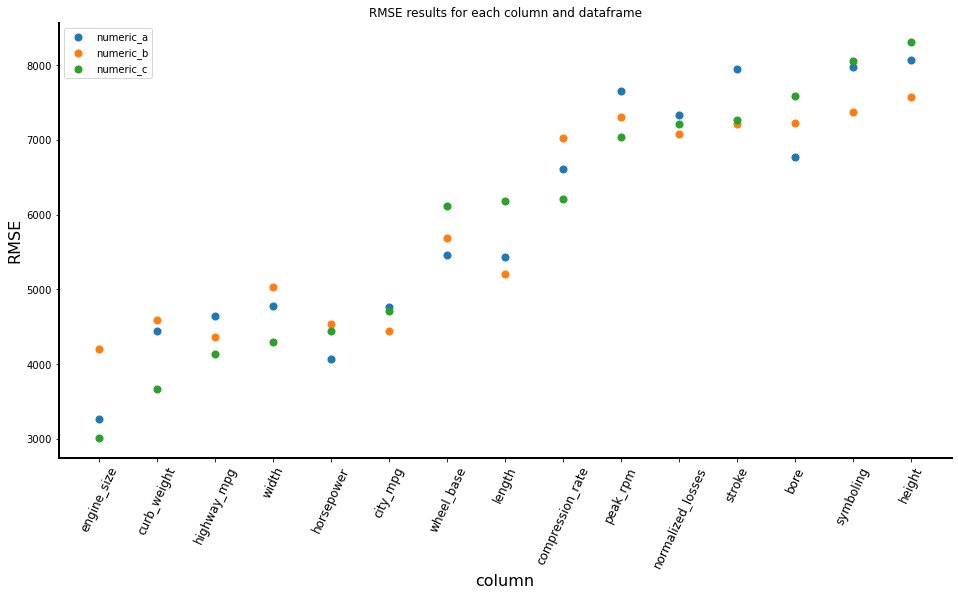

In [369]:
labels = ['numeric_a','numeric_b' ,'numeric_c']
y_list = [results_frame['numeric_a'], results_frame['numeric_b'], results_frame['numeric_c']]

def scatter_3(x, y_list, labels, size=10, alpha = 1):
    p1 = plt.scatter( x=x, y=y_list[0] ,label=labels[0], s=size)
    p2 = plt.scatter( x=x, y=y_list[1] ,label=labels[1], s=size)
    p3 = plt.scatter( x=x, y=y_list[2] ,label=labels[2], s=size)
    return p1, p2, p3

def scatter_3v2(x, y_list, labels, size=1, alpha = 1):
    p1 = sns.stripplot(x=x, y=y_list[0], label=labels[0], s=size,  alpha=alpha, color='#1f77b4')
    p2 = sns.stripplot(x=x, y=y_list[1], label=labels[1], s=size,  alpha=alpha, color='#ff7f0e' )
    p3 = sns.stripplot(x=x, y=y_list[2], label=labels[2], s=size,  alpha=alpha, color='green')
    return p1, p2, p3

fig, ax = plt.subplots(figsize=(16,8))

scatter_3(results_frame.index, y_list, labels, 50)
spines(ax)

ax.tick_params(axis = 'x',labelsize=12, rotation=65)
# plt.legend(loc=2)
plt.xlabel('column', size=16)
plt.ylabel('RMSE',  size=16)
plt.title('RMSE results for each column and dataframe')
plt.legend()
plt.show()

  


# Observations:
* taking extra care with filling in missing price values in dataframe 'numeric_c' paid of
* as expected 'engine_size' column delivers the best results (lowest rmse)
* big difference between numeric a and b is looks odd, we'll try a different arrangement of indexes:

# 2.2. Introducing random seed into the model

In [303]:
# create a function with a random seed input
def knn_train_test_v2(df, feature_col, target_col, r):
    
    # randomize 
    np.random.seed(r)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    
    # train and test 
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(train_set[[feature_col]], train_set[target_col])
    predictions = knn.predict(test_set[[feature_col]])
    rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))

    return rmse

In [304]:
df_list = [numeric_a, numeric_b, numeric_c]
results = []
def df_seed_check(df_list, col_name,n):
    best_results = []
    for df in df_list:
        seed_dictionary = {}
        for i in list(range(0,n)):
            seed_dictionary[i] = knn_train_test_v2(df,col_name, 'price', i)
            results.append(seed_dictionary[i])            
        best_results.append(min(seed_dictionary.items(), key=lambda x: x[1]))   
    return best_results

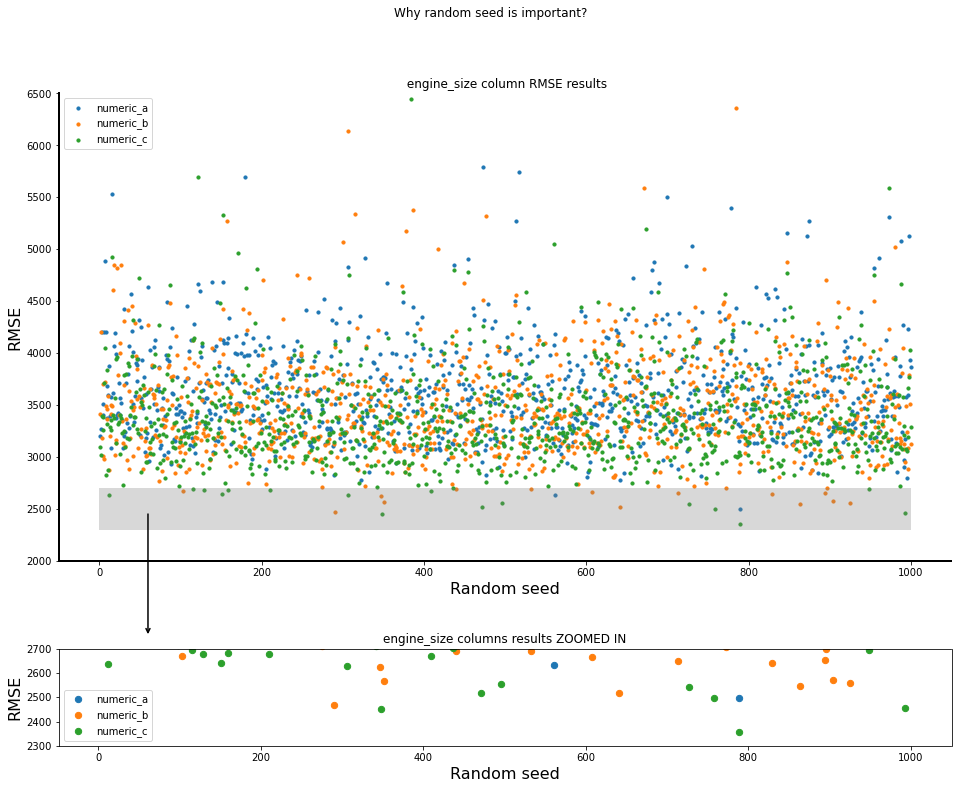

In [370]:
results = []
labels = ['numeric_a','numeric_b' ,'numeric_c']
df_seed_check(df_list,'engine_size',1000)
num_a_results = results[:1000].copy()
num_b_results = results[1000:2000].copy()
num_c_results = results[2000:].copy()

fig, ax = plt.subplots(figsize=(16,12))
fig.suptitle('Why random seed is important?')

grid = plt.GridSpec(8, 1, wspace=0, hspace=19.3)
ax1 = plt.subplot(grid[0:6, 0])

y_list = [num_a_results, num_b_results, num_c_results]
scatter_3(list(range(1,1001)), y_list, labels, 10)

plt.legend()
plt.title(' engine_size column RMSE results')
plt.xlabel('Random seed', size=16)
plt.ylabel('RMSE',  size=16)

ax1.add_patch(Rectangle((0, 2300), 1000, 400, alpha=0.3, facecolor = 'grey'))
plt.legend(loc=2)

plt.ylim(2000,6500)
plt.arrow(2,-3000, 10,500)

ax2 = plt.subplot(grid[6:, 0])
scatter_3(list(range(1,1001)), y_list, labels, 40)

plt.legend()
plt.title('engine_size columns results ZOOMED IN')
plt.xlabel('Random seed', size=16)
plt.ylabel('RMSE',  size=16)
spines(ax1)
ax.tick_params(labelsize=12)
plt.ylim(2300,2700)
plt.legend(loc=3)


con = ConnectionPatch(
    xyA=(0.1, 0.1), coordsA=ax1.transAxes,
    xyB=(0.1, 2759.7), coordsB=ax2.get_yaxis_transform(),
    arrowstyle="->", linewidth=1.5)
ax2.add_artist(con)
plt.show()

The above scatter plot presents 1000 rmse results for each of our 3 dataframes, but only the engine size column. For each result we've changed the random seed number. This clearly shows how different the results can be if we change the order of our dataframes index and split. 

# 2.2.1. Sidenote how much randomness do we need?
At first using various random seeds looks very attractive - we can improve our results in a very easy way. But we're only improving them in this single dataset example... and our end goal is to create a model that can be 'released into the wild' and work on various datasets isn't it? Thus we should pursue not the single best result but mean of many results. All of this comes at a price: computing models with multiple random seeds takes time and computational power. We must try to answer the question: how much is enough?

In [383]:
nums2 = []
x = 1
for n in list(range(1,7)):
    x *= 4
    nums2.append(x)
nums2

[4, 16, 64, 256, 1024, 4096]

In [386]:
nums = [1,10,100,500,1000,5000]
nums = nums2
mean_list = []
std_list = []
best_list = []
for n in nums:    
    results = []
    df_list = [numeric_c_n]
    x = df_seed_check(df_list,'engine_size',n)
    mean_list.append(np.std(results))
    std_list.append(np.mean(results))
    best_list.append(x)
    
seed_frame = pd.DataFrame([mean_list,std_list,best_list], index=('std','mean','best result'), columns=[str(col) for col in nums])
seed_frame = seed_frame.transpose()
seed_frame['best result'] = seed_frame['best result'].str[0].str[1]
seed_frame['mean change'] =(seed_frame['mean'] - seed_frame['mean'].shift()) / seed_frame['mean'].shift() * 100
seed_frame['best result change'] =(seed_frame['best result'] - seed_frame['best result'].shift()) / seed_frame['best result'].shift() * 100
seed_frame.index.name = 'number of seeds'
seed_frame

,std,mean,best result,mean change,best result change
number of seeds,,,,,
4,169.773707,3220.754961,3014.293169,NaN,NaN
16,531.362191,3388.531008,2636.971126,5.209215,-12.517762
64,420.287777,3438.397706,2636.971126,1.471632,0.000000
256,447.763487,3397.101321,2636.971126,-1.201036,0.000000
1024,453.550087,3385.32257,2353.206318,-0.346729,-10.761013
4096,439.748785,3372.912832,2306.099998,-0.366575,-2.001793


In [396]:
df_list = [numeric_c]
%timeit df_seed_check(df_list,'engine_size',4)

25.5 ms ± 3.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [397]:
%timeit df_seed_check(df_list,'engine_size',16)

114 ms ± 23.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [398]:
%timeit df_seed_check(df_list,'engine_size',256)

1.29 s ± 42.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [399]:
%timeit df_seed_check(df_list,'engine_size',1024)

5.96 s ± 1.19 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


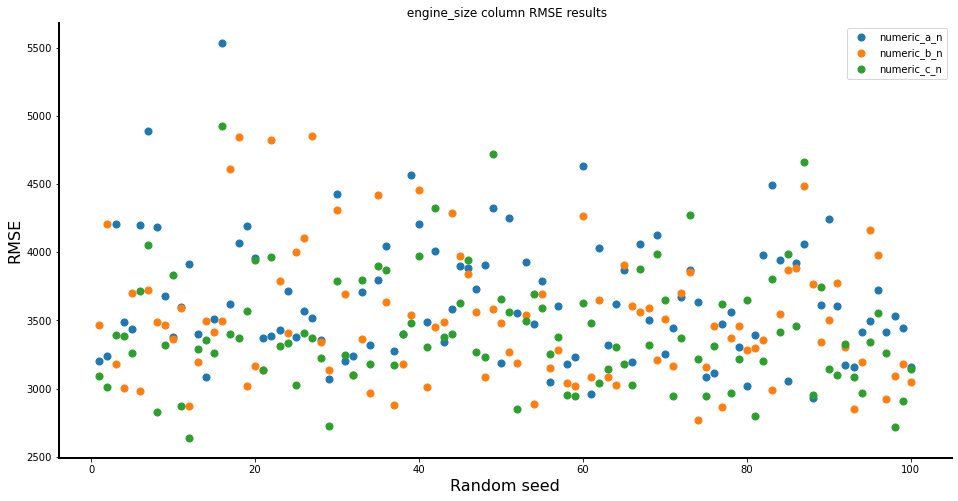

In [400]:
df_n_list = [numeric_a_n, numeric_b_n, numeric_c_n]
results = []
labels = ['numeric_a_n','numeric_b_n' ,'numeric_c_n']
df_seed_check(df_n_list,'engine_size',100)
num_a_results = results[:100].copy()
num_b_results = results[100:200].copy()
num_c_results = results[200:].copy()
fig, ax = plt.subplots(figsize=(16,8))
ax1 = plt.subplot()
y_list = [num_a_results, num_b_results, num_c_results]
scatter_3(list(range(1,101)), y_list, labels=labels, size=50)

plt.title(' engine_size column RMSE results')
plt.xlabel('Random seed', size=16)
plt.ylabel('RMSE',  size=16)
plt.legend(loc=1)
spines(ax1)
plt.show()

# Observations:
* as we increase the number of random seeds we're testing, the best result is dropping
    * the dataset is being reshuffled in a way that's more beneficient for the rmse results
    * Theoretically if we were to constantly increase the number of random seeds, eventually we'd hit the perfect score (we're not going to check that in this notebook, I like my laptop)
* the mean of the model results doesn't change much as we increase the number of random seeds
* **standard deviation does register significant changes at first - it should be a good indicator of our smallest number of random seeds**
* 100 random seeds should be a number high enough to test the model without significant computing time

# 2.3. Comparing results of normalized and non normalized dataframes:

In [391]:
# create dataframes with average results for every column:

# non normalized results: 
df_list = [numeric_a, numeric_b, numeric_c]
best = 10000
best_column =''
best_df=''
for col in results_frame.columns:
    results_frame[col].values[:] = 0
for n in list(range(0,100)):
    rmse_dict_a, rmse_dict_b, rmse_dict_c = fill_dict(knn_train_test,dlist=df_list ,r=n)
    results_df = give_results_df(rmse_dict_a, rmse_dict_b, rmse_dict_c )
    if results_df.min(axis=1).min() < best:
        best = results_df.min(axis=1).min()
        best_column = results_df.min(axis=1).idxmin() + ', seed:' + str(n)
        best_df = results_df.min().sort_values().index[0]
    results_frame += results_df
results_frame_non = results_frame / len(list(range(0,100)))

# normalized results:
best_norm = 10000
best_column_norm =''
best_df_n=''
for col in results_frame.columns:
    results_frame[col].values[:] = 0
for n in list(range(0,100)):
    rmse_dict_a, rmse_dict_b, rmse_dict_c = fill_dict(knn_train_test,dlist=df_n_list ,r=n)
    results_df = give_results_df(rmse_dict_a, rmse_dict_b, rmse_dict_c )
    # lets create a small detour in this loop to check the single best result:
    if results_df.min(axis=1).min() < best_norm:
        best_norm = results_df.min(axis=1).min()
        best_column_norm = results_df.min(axis=1).idxmin() + ', seed:' + str(n)
        best_df_n = results_df.min().sort_values().index[0]
    results_frame += results_df
results_frame_norm = results_frame / len(list(range(0,100)))
results_frame_norm.columns = ['numeric_a_n','numeric_b_n','numeric_c_n']

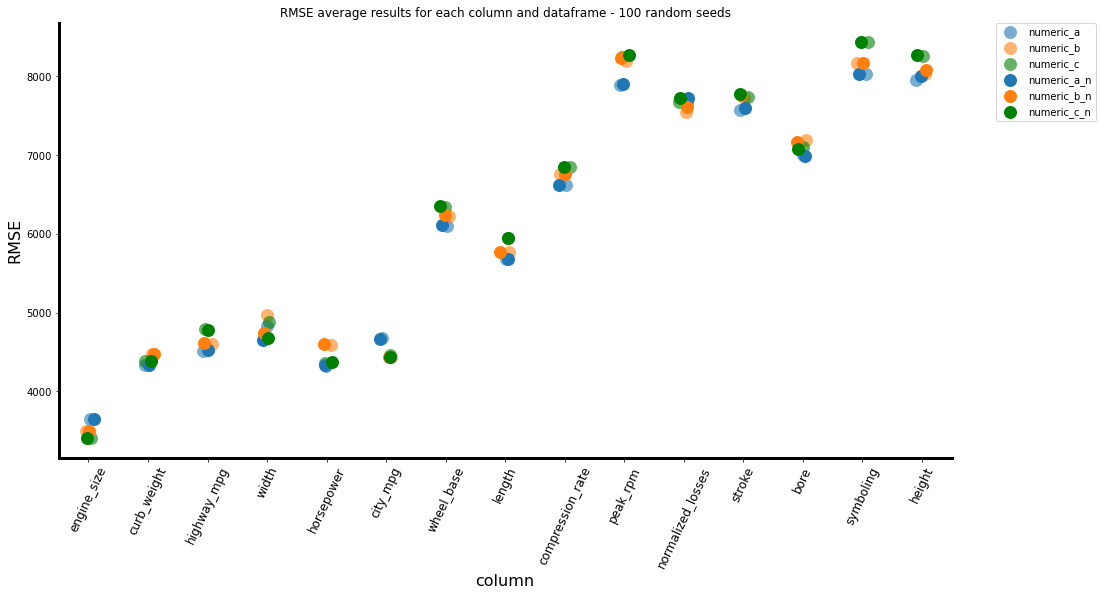

In [404]:
y_list1 = [results_frame_non['numeric_a'], results_frame_non['numeric_b'], results_frame_non['numeric_c']]
y_list2 = [results_frame_norm['numeric_a_n'], results_frame_norm['numeric_b_n'], results_frame_norm['numeric_c_n']]

fig, ax = plt.subplots(figsize=(16,8))

scatter_3v2(results_frame_non.index, y_list1, labels, 13, alpha=0.6)
scatter_3v2(results_frame_norm.index, y_list2, labels, 13)

spines(ax)
ax.tick_params(axis = 'x',labelsize=12, rotation=65)
# plt.legend(loc=2)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[::15], ['numeric_a','numeric_b','numeric_c','numeric_a_n','numeric_b_n','numeric_c_n'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
spines2()
plt.xlabel('column', size=16)
plt.ylabel('RMSE',  size=16)
plt.title('RMSE average results for each column and dataframe - 100 random seeds')
plt.show()

**Observations:**
- engine_size has the best rmse average results
- very small difference between normalized and non-normalized dataframes

In [393]:
# Remember that our loop also checked the best results?
print('best non-normalized results: ', round(best,2),' column: ', best_column, ' best df: ',best_df)
print('best normalized results: ',round(best_norm,2),' column: ', best_column_norm, ' best df: ',best_df_n)

best non-normalized results:  2636.97  column:  engine_size, seed:11  best df:  numeric_c
best normalized results:  2636.97  column:  engine_size, seed:11  best df:  numeric_c


In [394]:
# lets check our average results BUT only for the first 6 columns (the idea is -
# we know we won't use all of the columns for multi-column models)
pd.concat([results_frame_norm[:6].mean(), results_frame_non[:6].mean()])

numeric_a_n    4358.715630
numeric_b_n    4396.028186
numeric_c_n    4344.353694
numeric_a      4390.045094
numeric_b      4429.656350
numeric_c      4383.198739
dtype: float64

# Observations:
* combination of numeric_c_n dataframe and engine_size column deliver the best results 
* worth noting that numeric_c_n is not the best dataframe for many columns 
    * this might mean that in the next steps (when we're going to try multiple column models) numeric_c_n is not going to be the best dataframe
* normalized dataframes perform slighly better - we'll stop using non-normalized dataframes

# 2.3.1. Column selection

In [395]:
results_frame_norm[:6]

,numeric_a_n,numeric_b_n,numeric_c_n
engine_size,3646.149961,3503.280847,3411.582309
curb_weight,4333.835797,4479.708402,4381.759039
highway_mpg,4521.929554,4609.537973,4783.851207
width,4647.999496,4747.806227,4679.850873
horsepower,4334.431229,4596.600987,4367.352011
city_mpg,4667.947744,4439.234678,4441.726729


In [291]:
results_frame_norm[:6][:2].mean()

numeric_a_n    7900.286595
numeric_b_n    7855.739753
numeric_c_n    8020.856160
dtype: float64

In [292]:
results_frame_norm[:6][:4].mean()

numeric_a_n    6904.395699
numeric_b_n    6932.891862
numeric_c_n    7115.614935
dtype: float64

In [293]:
results_frame_norm[:6][:6].mean()

numeric_a_n    6704.449697
numeric_b_n    6755.681769
numeric_c_n    6885.885753
dtype: float64

# Observations:
* There is no single best combination
    * different columns perform differently in different dataframes
    * the only certain value is the engine_size column - we can clearly see we'll always want to include that column in our models, unfortunatelly at this stage it's not practical to answer what other columns, how many, which dataframe 



# 2.4. Multivariate Model

In [270]:
def knn_train_test_v3(df, train_cols, target_col, seed, k=5):
    
    # randomize 
    np.random.seed(seed)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()

    rmse_dict = {}   

    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_set[train_cols], train_set[target_col])
    predictions = knn.predict(test_set[train_cols])
    rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))
    

    return rmse

In [420]:
dict_a

{"['engine_size', 'curb_weight', 'highway_mpg', 'width', 'horsepower', 'city_mpg', 'wheel_base', 'length']": 3647.460065294861}

In [425]:
def fill_dict_v2(model,col_list, dlist=df_n_list, r=1, k=5, ):
    rmse_dict_a = {}
    rmse_dict_b = {}
    rmse_dict_c = {}
    rmse_dict_a[str(col_list)] = model(dlist[0], col_list, 'price', r, k)
    rmse_dict_b[str(col_list)] = model(dlist[1], col_list, 'price', r, k)
    rmse_dict_c[str(col_list)] = model(dlist[2], col_list, 'price', r, k)
    return rmse_dict_a, rmse_dict_b, rmse_dict_c

df_results_list = []
for n in list(range(2,8)):
    col_list = results_frame_norm.index[:n].tolist()
    dict_a, dict_b, dict_c = fill_dict_v2(knn_train_test_v3, col_list)
    results_frame = give_results_df(dict_a, dict_b, dict_c)
    df_results_list.append(results_frame)
mutli_cols_df = pd.concat(df_results_list) 
mutli_cols_df.columns = ['numeric_a_n', 'numeric_b_n', 'numeric_c_n']
mutli_cols_df

,numeric_a_n,numeric_b_n,numeric_c_n
"['engine_size', 'curb_weight']",3330.869800,3657.896664,2791.664988
"['engine_size', 'curb_weight', 'highway_mpg']",3413.544315,3848.872270,2964.095155
"['engine_size', 'curb_weight', 'highway_mpg', 'width']",3596.417368,3655.264952,2532.332056
"['engine_size', 'curb_weight', 'highway_mpg', 'width', 'horsepower']",3410.217013,3789.590624,2725.092022
"['engine_size', 'curb_weight', 'highway_mpg', 'width', 'horsepower', 'city_mpg']",3416.042892,3628.898274,2644.465049
"['engine_size', 'curb_weight', 'highway_mpg', 'width', 'horsepower', 'city_mpg', 'wheel_base']",3659.516895,3999.202836,3119.720636


In [ ]:
# all_features = numeric.columns.tolist()
# all_features.remove('price')

# df_list = [numeric_a, numeric_b, numeric_c]
# df_n_list = [numeric_a_n, numeric_b_n, numeric_c_n]

def fill_dict(model, dlist=df_list, r=1):
    rmse_dict_a = {}
    rmse_dict_b = {}
    rmse_dict_c = {}
    for col in all_features:
        rmse_dict_a[col] = model(dlist[0], col, 'price', r)
    for col in all_features:
        rmse_dict_b[col] = model(dlist[1], col, 'price', r)
    for col in all_features:
        rmse_dict_c[col] = model(dlist[2], col, 'price', r)
    return rmse_dict_a, rmse_dict_b, rmse_dict_c



def give_results_df(dict1, dict2, dict3):
    results_a = pd.DataFrame.from_dict(dict1, orient='index')
    results_b = pd.DataFrame.from_dict(dict2, orient='index')
    results_c = pd.DataFrame.from_dict(dict3, orient='index')

    results_frame_ab = results_a.merge(results_b, left_index=True, right_index=True, suffixes=['_numeric_A', '_numeric_B'])
    results_frame = results_frame_ab.merge(results_c, left_index=True, right_index=True)
    results_frame = results_frame.rename(columns={results_frame.columns[0]: 'numeric_a', results_frame.columns[1]: 'numeric_b', 
                                  results_frame.columns[2]: 'numeric_c'
                                  })
    results_frame = results_frame.sort_values(results_frame.loc['engine_size',:].idxmin(axis=0))
    return results_frame
    
# rmse_dict_a, rmse_dict_b, rmse_dict_c = fill_dict(knn_train_test)

# results_frame = give_results_df(rmse_dict_a, rmse_dict_b, rmse_dict_c )
# results_frame



# AAAAAAAAAKLADLHAKBSJASASHLAKSJLAKSJALKSJLKSALKSALKSALKSLKASJAKLSJALKSJALKSJALKSJALKSJALKSJALKJASLKAJSLK
# AAAAAAAAAKLADLHAKBSJASASHLAKSJLAKSJALKSJLKSALKSALKSALKSLKASJAKLSJALKSJALKSJALKSJALKSJALKSJALKJASLKAJSLK
# AAAAAAAAAKLADLHAKBSJASASHLAKSJLAKSJALKSJLKSALKSALKSALKSLKASJAKLSJALKSJALKSJALKSJALKSJALKSJALKJASLKAJSLK
# AAAAAAAAAKLADLHAKBSJASASHLAKSJLAKSJALKSJLKSALKSALKSALKSLKASJAKLSJALKSJALKSJALKSJALKSJALKSJALKJASLKAJSLK

# Observations:
* **testing out various random seed numbers can drastically improve our results**
* 'engine_size' column delivers the best results
    * numeric_c_n dataframe gives us the best results in our model for 'engine_size' column
* it's worth noting that numeric_c_n is the best dataframe for a model based on single column: 'engine_size'
    * other columns can have better results on different dataframes - something to remember, when we'll be improving our model by adding more training columns
* a very important findig is that we have a clear winner for the best columns, but results for the second place can vary
    * **we'll need to remember that when selecting columns for a multiple-column model**
* normalizing the dataframe gives us a very small advantage on 'engine_size' column
    * in some cases the normalized dataframes didn't perform as well as the dataframes that haven't been normalized

# 3. modyfing the k value
For the time being lets set the random seed number to 788 (the best we found in previous steps), and focus on k value.
We'll run our model using various columns and 3 different dataframes(numeric_a_n, numeric_b_n and numeric_c_n) and 5 different k values (1, 3, 5, 7 and 9).
* the results we'll be saved to a dataframe with columns(or rows) named after the dataframe and k value 
    * eg. numeric_a_n_k3 is a series named after results of the model for dataframe 'numeric_a_n' k value '3'

# 3.1. Update the model: include various k-values 

# 3.2. Generate a dataframe consisting of results for 3 different dataframes, all their columns and 5 different k-values
Remember that for now, the random seed value stays the same.

In [ ]:
     
def fill_3_frames():  
    
    results_a = pd.DataFrame.from_dict(rmse_dict_a, orient='index')
    for n in range(len(results_a.columns)):
        results_a = results_a.rename(columns= {results_a.columns[n]: col_names[n]}) 
    results_b = pd.DataFrame.from_dict(rmse_dict_b, orient='index')
    for i in range(5,(len(results_b.columns)+5)):
        results_b = results_b.rename(columns= {results_b.columns[i-5]: col_names[i]}) 
    results_c = pd.DataFrame.from_dict(rmse_dict_c, orient='index')
    for i in range(10,(len(results_c.columns)+10)):
        results_c = results_c.rename(columns= {results_c.columns[i-10]: col_names[i]}) 
    return results_a, results_b, results_c

results_a, results_b, results_c = fill_3_frames()


# Observations:
* overall the best result is still numeric_c_n with k value = 5 (rmse = 2353.206318), that comes with no surprise 
* the interesting discovery is that the mentioned dataframe and k value (numeric_c_n_k5) can't be seen anywhere else in top results for other columns!
    * this may lead to an interesting conclusion: numeric_c_n may be not the best dataframe for multiple column models, which will build in the future
* numeric_a_n_k5 occurs frequently in the best columns - it may become our best candidate for multiple column models


# remember that numeric_c_n was the best df for single column model?
We're about to start trying multiple column models, but before we do:
lets check how dataframes perform when we're not interested in the single best result of rmse - we're more interested in the best 2,3,4 or 5 results>

# 3.3. For every dataframe - k-value option: create an average result of best 2, 3, 4 and 5 columns

# 3.4 Check which dataframe and k-value delivers best result for 2 columns, 3 columns, 4 and 5, also display the best result

# Now lets. repeat those steps a 1000 times

So we know that engine size is very often the best column but not always?(check random seed) we'd like to learn which 5 columns are the best most often!

If we were to look only at the dictionary of average results for all the columns, our top 2 columns would be:
* engine_size
* width

But if we actually check the 2 columns which score the best result. We'll see different columns:
* engine_size
* horsepower

Again remember these are just single column results! But the big question is which ones should we choose? I'm leaning towards the dictionary of average results - we know it works in multiple cases. The best result just shows us how the model worked in best case scenario. 

In [ ]:
def knn_train_test_v5(df, train_cols, target_col, seed):
    
    # randomize 
    np.random.seed(seed)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()

    rmse_dict = {}   

    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(train_set[train_cols], train_set[target_col])
    predictions = knn.predict(test_set[train_cols])
    rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))
    

    return rmse

# check all the dfs!!!

# now lets implement multiple cols and  k-values!

In [ ]:
def knn_train_test_v6(df, train_cols, target_col, seed):
    
    # randomize 
    np.random.seed(seed)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    k_list = list(range(1,26))
    rmse_dict = {} 
    best_result = 3000
    z = 1000000
    for k in k_list:
    # train and test 
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[train_cols], train_set[target_col])
        predictions = knn.predict(test_set[train_cols])
        rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))
        if rmse < best_result:
            best_result = rmse
            z = k
    return best_result, z

In [ ]:
knn_train_test_v6(numeric_b_n,best_cols_for3_5.index.tolist()[:5],'price', 903)

In [ ]:
best = 10000
for df in range(len(df_n_list)):
    for i in range(0,13):
        x, k = knn_train_test_v6(df_n_list[df],['engine_size', 'highway_mpg'],'price', i)
        if x < best:
            best = x
            y = i
            z = df
            q = k
print('best 2 cols result: ',best,' best seed: ',y, ', best df:', df_names[z],' ,best k value:' q)

In [ ]:
best = 10000
for df in range(len(df_n_list)):
    for i in range(0,13):
        x, k = knn_train_test_v6(df_n_list[df],best_cols_for3_5.index.tolist()[:3],'price', i)
        if x < best:
            best = x
            y = i
            z = df
            q = k
print('best 3 cols result: ',best,' best seed: ',y, ', best df:', df_names[z],' ,best k value:', q)

In [ ]:
best = 10000
for df in range(len(df_n_list)):
    for i in range(0,13):
        x, k = knn_train_test_v6(df_n_list[df],best_cols_for3_5.index.tolist()[:4],'price', i)
        if x < best:
            best = x
            y = i
            z = df
            q = k
print('best 4 cols result: ',best,' best seed: ',y, ', best df:', df_names[z],' ,best k value:', q)

In [ ]:
best = 10000
for df in range(len(df_n_list)):
    for i in range(0,13):
        x, k = knn_train_test_v6(df_n_list[df],best_cols_for3_5.index.tolist()[:5],'price', i)
        if x < best:
            best = x
            y = i
            z = df
            q = k
print('best 5 cols result: ',best,' best seed: ',y, ', best df:', df_names[z],' ,best k value:', q)

In [ ]:
best = 10000
for df in range(len(df_n_list)):
    for i in range(0,13):
        x, k = knn_train_test_v6(df_n_list[df],best_cols_for3_5.index.tolist()[:6],'price', i)
        if x < best:
            best = x
            y = i
            z = df
            q = k
print('best 6 cols result: ',best,' best seed: ',y, ', best df:', df_names[z],' ,best k value:', q)

In [ ]:
best = 10000
results = []
for df in range(len(df_n_list)):
    for i in range(0,13):
        x, k = knn_train_test_v6(df_n_list[df],best_cols_for3_5.index.tolist()[:7],'price', i)
        if x < best:
            best = x
            y = i
            z = df
            q = k
print('best 7 cols result: ',best,' best seed: ',y, ', best df:', df_names[z],' ,best k value:', q)

# visualize!

In [ ]:
def knn_train_test_v7(df, train_cols, target_col, seed, k):
    
    # randomize 
    np.random.seed(seed)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(index = shuffled_index)
    split_loc = int(0.5*len(df))
    # split
    train_set = df.iloc[:split_loc].copy()
    test_set  = df.iloc[split_loc:].copy()
    
    rmse_dict = {} 
    # train and test 
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_set[train_cols], train_set[target_col])
    predictions = knn.predict(test_set[train_cols])
    rmse = np.sqrt(mean_squared_error(test_set[target_col], predictions))
    return rmse

In [ ]:
knn_train_test_v7(numeric_a_n,best_cols_for3_5.index.tolist()[:2],'price', 2, 2)

In [ ]:
best = 10000
results_k = []
for df in range(len(df_n_list)):
    for i in range(0,13):
        for k in range(1,26):
            x = knn_train_test_v7(df_n_list[df],best_cols_for3_5.index.tolist()[:2],'price', i, k)
            if x < best:
                best = x
                y = i
                z = df
                q = k
            results_k.append(x)
# print('best 7 cols result: ',best,' best seed: ',y, ', best df:', df_names[z],' ,best k value:', q)
len(results_k)

# what about 2 cols 3 cols 4 and 5 cols?!

In [ ]:
shift_1 = []
for i in list(range(1,26)):
    shift_1.append(i-0.1)
shift_2 = []
for i in list(range(1,26)):
    shift_2.append(i+0.1)

res_df_a = []
res_df_b = []
res_df_c = []
fig, ax = plt.subplots(figsize=(16,12))
for z in range(1,200):
    some_list_a = []
    some_list_b = []
    some_list_c = []
    
    for k in range(1,26):
        x1 = knn_train_test_v7(numeric_a_n,best_cols_list[:2],'price', z, k)
        some_list_a.append(x1)
        x2 = knn_train_test_v7(numeric_b_n,best_cols_list[:2],'price', z, k)
        some_list_b.append(x2)
        x3 = knn_train_test_v7(numeric_c_n,best_cols_list[:2],'price', z, k)
        some_list_c.append(x3)
        
    res_df_a.append(some_list_a)
    res_df_b.append(some_list_b)
    res_df_c.append(some_list_c)
    
    plt.scatter( x=shift_1, y=res_df_a[z-1] ,label='numeric_a', s=10, color='r', zorder=3)
    plt.scatter( x=list(range(1,26)), y=res_df_b[z-1] ,label='numeric_b', s=10, color='b',zorder=3)
    plt.scatter( x=shift_2, y=res_df_c[z-1] ,label='numeric_c', s=10, color='g',zorder=3)
spines(ax)
for i in list(range(1,26)):
    plt.axvline(i, zorder=0, color='black', alpha=0.2 ,linewidth=1)
plt.xlabel('k number')
plt.ylabel('RMSE result')
ax.set_xticks(range(1,26))
# plt.legend()
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[:3], labels[:3], loc=2)
# plt.legend(labels=('numeric_a','numeric_b','numeric_c'))
plt.title('RMSE results for 3 versions of the dataframe and different k numbers')
plt.show()

In [ ]:
best_cols_list[:2]

In [ ]:
# results numeric A
names_list = []
for i in range(len(res_df_a)):
    names_list.append(str(i))
d = {}
for df in range(len(res_df_a)):
    d[names_list[df]] = res_df_a[df]
avg_for_ka = pd.DataFrame(data=d, index=(list(range(1,26))))
avg_for_ka['mean of k'] = avg_for_ka.mean(axis=1)
avg_for_ka['std of k'] = avg_for_ka.iloc[:,:-2].std(axis=1)
avg_for_ka

In [ ]:
# results numeric B
names_list = []
for i in range(len(res_df_b)):
    names_list.append(str(i))
d = {}
for df in range(len(res_df_b)):
    d[names_list[df]] = res_df_b[df]
avg_for_kb = pd.DataFrame(data=d, index=(list(range(1,26))))
avg_for_kb['mean of k'] = avg_for_kb.mean(axis=1)
avg_for_kb['std of k'] = avg_for_kb.iloc[:,:-1].std(axis=1)
avg_for_kb.sort_values('mean of k')['mean of k'][:5]

In [ ]:
# results numeric C
names_list = []
for i in range(len(res_df_c)):
    names_list.append(str(i))
d = {}
for df in range(len(res_df_c)):
    d[names_list[df]] = res_df_c[df]
avg_for_kc = pd.DataFrame(data=d, index=(list(range(1,26))))
avg_for_kc['mean of k'] = avg_for_kc.mean(axis=1)
avg_for_kc['std of k'] = avg_for_kc.iloc[:,:-1].std(axis=1)
avg_for_kc.sort_values('mean of k')['mean of k'][:5]

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
plt.scatter( x=avg_for_ka.index, y=avg_for_ka['mean of k'] ,label='numeric_a', s=50)
plt.scatter( x=avg_for_kb.index, y=avg_for_kb['mean of k'] ,label='numeric_b', s=50)
plt.scatter( x=avg_for_kc.index, y=avg_for_kc['mean of k'] ,label='numeric_c', s=50)
spines(ax)
plt.title('Avg rmse values per k value for 2 cols')
plt.legend(labels=('numeric_a','numeric_b','numeric_c'))
plt.show()

# do this wth a function!!!! BELOW

In [ ]:
def avg_rmse_per_k(seed,col_number):
    res_df_a = []
    res_df_b = []
    res_df_c = []

    for z in range(1,seed):
        some_list_a = []
        some_list_b = []
        some_list_c = []

        for k in range(1,26):
            x1 = knn_train_test_v7(numeric_a_n,best_cols_list[:col_number],'price', z, k)
            some_list_a.append(x1)
            x2 = knn_train_test_v7(numeric_b_n,best_cols_list[:col_number],'price', z, k)
            some_list_b.append(x2)
            x3 = knn_train_test_v7(numeric_c_n,best_cols_list[:col_number],'price', z, k)
            some_list_c.append(x3)

        res_df_a.append(some_list_a)
        res_df_b.append(some_list_b)
        res_df_c.append(some_list_c)

    names_list = []
    for i in range(len(res_df_a)):
        names_list.append(str(i))
    d = {}
    for df in range(len(res_df_a)):
        d[names_list[df]] = res_df_a[df]
    avg_for_ka = pd.DataFrame(data=d, index=(list(range(1,26))))
    avg_for_ka['mean of k'] = avg_for_ka.mean(axis=1)
    avg_for_ka['std of k'] = avg_for_ka.iloc[:,:-2].std(axis=1)

    names_list = []
    for i in range(len(res_df_b)):
        names_list.append(str(i))
    d = {}
    for df in range(len(res_df_b)):
        d[names_list[df]] = res_df_b[df]
    avg_for_kb = pd.DataFrame(data=d, index=(list(range(1,26))))
    avg_for_kb['mean of k'] = avg_for_kb.mean(axis=1)
    avg_for_kb['std of k'] = avg_for_kb.iloc[:,:-1].std(axis=1)

    names_list = []
    for i in range(len(res_df_c)):
        names_list.append(str(i))
    d = {}
    for df in range(len(res_df_c)):
        d[names_list[df]] = res_df_c[df]
    avg_for_kc = pd.DataFrame(data=d, index=(list(range(1,26))))
    avg_for_kc['mean of k'] = avg_for_kc.mean(axis=1)
    avg_for_kc['std of k'] = avg_for_kc.iloc[:,:-1].std(axis=1)

    avg_frame = pd.DataFrame([avg_for_ka['mean of k'], avg_for_kb['mean of k'],avg_for_kc['mean of k']], index=('numeric_a', 'numeric_b', 'numeric_c'))
    #
    std_frame = pd.DataFrame([avg_for_ka['std of k'], avg_for_kb['std of k'],avg_for_kc['std of k']], index=('numeric_a', 'numeric_b', 'numeric_c'))
    std_frame = std_frame.transpose()
    #
    
    avg_frame = avg_frame.transpose()

    return avg_frame, std_frame

shift_1 = []
for i in list(range(1,26)):
    shift_1.append(i-0.1)
shift_2 = []
for i in list(range(1,26)):
    shift_2.append(i+0.1)

def scatter_man(frame, label):

    plot1 = plt.scatter( x=shift_1, y=frame['numeric_a'] ,label=frame.columns[0]+label, s=60,  zorder=3)
    plot2 = plt.scatter( x=list(range(1,26)), y=frame['numeric_b'] ,label=frame.columns[1]+label, s=60,  zorder=3)
    plot3 = plt.scatter( x=shift_2, y=frame['numeric_c'] ,label=frame.columns[2]+label, s=60,  zorder=3)
    return plot1, plot2, plot3


fig, ax = plt.subplots(figsize=(16,12))
    
df1, dfs1 = avg_rmse_per_k(1000,2)
df2, dfs2 = avg_rmse_per_k(1000,3)
df3, dfs3 = avg_rmse_per_k(1000,4)
df4, dfs4 = avg_rmse_per_k(1000,5)

scatter_man(df1, ' 2 columns')
scatter_man(df2, ' 3 columns')
scatter_man(df3, ' 4 columns')
scatter_man(df4, ' 5 columns')


for i in list(range(1,26)):
    plt.axvline(i, zorder=0, color='black', alpha=0.7 ,linewidth=1)
spines(ax)
plt.title('Avg rmse values per k value')

colormap = plt.cm.nipy_spectral #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])


ax.legend(fontsize='small')
# ax.set_facecolor('#DAF7A6')
# plt.legend()
plt.show()

In [ ]:
# dataframe of avg results
step1 = df1.merge(df2, left_index=True, right_index=True, suffixes=(' 2 cols',' 3 cols'))
step2 = step1.merge(df3, left_index=True, right_index=True)
step3 = step2.merge(df4, left_index=True, right_index=True, suffixes=(' 4 cols', ' 5 cols'))
step4 = step3.transpose()
# dataframe of std results
step1s = dfs1.merge(dfs2, left_index=True, right_index=True, suffixes=(' 2 cols',' 3 cols'))
step2s = step1s.merge(dfs3, left_index=True, right_index=True)
step3s = step2s.merge(dfs4, left_index=True, right_index=True, suffixes=(' 4 cols', ' 5 cols'))
step4s = step3s.transpose()

avg_std_results = step4.merge(step4s, left_index=True, right_index=True, suffixes=(' k avg',' k std'))
avg_std_results['best k for avg'] = avg_std_results.loc[:,:'25 k avg'].idxmin(axis=1).str[0]
avg_std_results['best avg result'] = avg_std_results.loc[:,:'25 k avg'].min(axis=1)
avg_std_results['best k for std'] = avg_std_results.loc[:,'1 k std':'25 k std'].idxmin(axis=1).str[0]
avg_std_results['best std result'] = avg_std_results.loc[:,'1 k std':'25 k std'].min(axis=1)
avg_std_results.loc[:,'best k for avg':].sort_values('best avg result')

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
for col in step4:
    plt.scatter(x=step4.index, y=step4[col] , s=20)
ax.tick_params(axis = 'x',labelsize=12, rotation=65)

# plt.scatter( x=step3[], y=step3['numeric_a'] ,label=frame.columns[0]+label, s=60,  zorder=3)

In [ ]:
step3 aaa

# numeric_b 3 cols k=2 gives us the best avg result 
OR DOES IT?
We used cols from best cols list from single column model results

In [ ]:
top5cols = best_cols_list[1:6]
random.shuffle(top5cols)
res_df_b = []
# col_variants
top_list = []
def avg_rmse_per_col_vars(seed, cols_amount, cols_vars):    
    dict_abc = {}

    res_df_a = []
    res_df_b = []
    res_df_b = []

    fucking_remembera = 5000
    best_besta = 5000
    fucking_rememberb = 5000
    best_bestb = 5000
    fucking_rememberc = 5000
    best_bestc = 5000

    # in the future just put in a factorial here:
    for i in range(0,cols_vars):
        other_col_list = []
        other_col_list.append(best_cols_list[0])
        top5cols = best_cols_list[1:6]
        random.shuffle(top5cols)   
        for el in top5cols[0:(cols_amount-1)]:
            other_col_list.append(el)

        some_list_a = []
        some_list_b = []
        some_list_c = []
        for z in range(0,seed):
            x1 = knn_train_test_v7(numeric_a_n,other_col_list,'price', z, 2)
            x2 = knn_train_test_v7(numeric_b_n,other_col_list,'price', z, 2)
            x3 = knn_train_test_v7(numeric_c_n,other_col_list,'price', z, 2)
            some_list_a.append(x1)
            some_list_b.append(x2)
            some_list_c.append(x3)

            if x1 < best_besta:
                best_besta = x1
            else:
                pass
            if x2 < best_bestb:
                best_bestb = x2
            else:
                pass
            if x3 < best_bestc:
                best_bestc = x3
            else:
                pass
        res_df_a.append(some_list_a)  
        res_df_b.append(some_list_b)
        res_df_c.append(some_list_c)
        if np.mean(some_list_a) < fucking_remembera:
            dict_abc['Best avg A'] = np.mean(some_list_a)
            dict_abc['Best avg A cols'] = other_col_list
        else:
            pass
        if np.mean(some_list_b) < fucking_rememberb:
            dict_abc['Best avg B'] = np.mean(some_list_b)
            dict_abc['Best avg B cols'] = other_col_list
        else:
            pass
        if np.mean(some_list_c) < fucking_rememberc:
            dict_abc['Best avg C'] = np.mean(some_list_c)
            dict_abc['Best avg C cols'] = other_col_list
        else:
            pass   

        top_list.append(res_df_a)
        top_list.append(res_df_b)
        top_list.append(res_df_c)
    return dict_abc
# now lets use that long function:

d2 = avg_rmse_per_col_vars(100, 2, 5) 
df2 = pd.DataFrame.from_dict(d2, orient='index')

d3 = avg_rmse_per_col_vars(100, 3, 10) 
df3 = pd.DataFrame.from_dict(d3, orient='index')

d4 = avg_rmse_per_col_vars(100, 4, 20) 
df4 = pd.DataFrame.from_dict(d4, orient='index')

d5 = avg_rmse_per_col_vars(100, 5, 100) 
df5 = pd.DataFrame.from_dict(d5, orient='index')

d6 = avg_rmse_per_col_vars(100, 6, 100) 
df6 = pd.DataFrame.from_dict(d6, orient='index')

data_frames = [df2, df3, df4, df5,df6]
result_1 = pd.concat(data_frames, join='outer', axis=1)

In [ ]:
result_2 = result_1.copy()
result_2.columns = ['2 cols','3 cols','4 cols','5 cols','6 cols']
result_2v2 = result_2.iloc[::2].astype(float).copy()
result_2v2['best df'] = result_2v2.idxmin(axis=1)
result_2v2

In [ ]:
df2

In [ ]:
# seed, cols_amount, cols_vars

In [ ]:
avg_rmse_per_col_vars(seed, cols_amount, cols_vars): 

In [ ]:
len(top_list)

In [ ]:
len(res_df_a)

In [ ]:
some_list_b = []
for z in range(0,100):
    x2 = knn_train_test_v7(numeric_c_n,['engine_size', 'highway_mpg'],'price', z, 2)
    some_list_b.append(x2)
np.mean(some_list_b)
    

In [ ]:
empty_list = []
for el in res_df_b:
    empty_list.append(np.mean(el))
empty_list

In [ ]:
knn_train_test_v8(numeric_a_n, best_cols_list[:5],'price', 2, 2, 4)

In [ ]:
def knn_train_test_v8(df, train_cols, target_col, seed, k, fold):
    
    rmse_dict = {} 
    # train and test 
    kf = KFold(fold, shuffle=True, random_state=seed)
    knn = KNeighborsRegressor(n_neighbors=k)
 
    mses = cross_val_score(knn, df[train_cols], df[target_col], scoring='neg_mean_squared_error', cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)

    return avg_rmse

In [ ]:

res_df_a = []
res_df_b = []
res_df_c = []
fig, ax = plt.subplots(figsize=(16,12))
for z in range(1,103):
    some_list_a = []
    some_list_b = []
    some_list_c = []
    
    for k in range(1,26):
        x1 = knn_train_test_v8(numeric_a_n,best_cols_for3_5.index.tolist()[:2],'price', z, k,y)
        some_list_a.append(x1)
        x2 = knn_train_test_v8(numeric_b_n,best_cols_for3_5.index.tolist()[:2],'price', z, k,y)
        some_list_b.append(x2)
        x3 = knn_train_test_v8(numeric_c_n,best_cols_for3_5.index.tolist()[:2],'price', z, k,y)
        some_list_c.append(x3)
        
    res_df_a.append(some_list_a)
    res_df_b.append(some_list_b)
    res_df_c.append(some_list_c)
    
    plt.scatter( x=shift_1, y=res_df_a[z-1] ,label='numeric_a', s=10, color='r')
    plt.scatter( x=list(range(1,26)), y=res_df_b[z-1] ,label='numeric_b', s=10, color='b')
    plt.scatter( x=shift_2, y=res_df_c[z-1] ,label='numeric_c', s=10, color='g')

plt.legend(labels=('numeric_a','numeric_b','numeric_c'))
plt.show()

In [ ]:


# knn = KNeighborsRegressor(algorithm='auto')
# mses = cross_val_score(knn, train_set[train_cols], test_set[train_cols], scoring='neg_mean_squared_error', cv=kf)
# rmses = np.sqrt(np.absolute(mses))
# avg_rmse = np.mean(rmses)